This project is part of my coursework for CS501: Math Foundations for Data Science, under Prof. Cowan Charles

## **1. VANILLA GRADIENT DESCENT**

In [ ]:
#import libraries
import numpy as np
from numpy.linalg import norm, eigvals
import matplotlib.pyplot as plt
import math

In [ ]:
# function to generate a standard normal vector
def generate_random_vector(n):
  rand_vec = np.random.standard_normal(n)
  return rand_vec

# function for computing norm of gradient
def gradient_norm(Q,X,c):
  grad = np.dot(Q,X) - c
  grad = norm(grad)
  grad = round(grad,5)
  return grad

In [ ]:
# dimension = 10
D = 10
# generate vector c
c = generate_random_vector(D)
# generate matrix A with every column as a randomly generated vector
A = generate_random_vector(D)
for i in range(1,D):
  A = np.c_[A,generate_random_vector(D)]
# generate matrix Q
Q = A.T@A
#print(Q)

# eigenvalues of Q
print('Eigenvalues of Q:\n', eigvals(Q)) 

# Observing (v.T Q v) for some non-zero vector v
v = generate_random_vector(D)
print('\nv^TQv:\n',np.dot(np.dot(np.transpose(v),Q),v))

Eigenvalues of Q:
 [30.99158047 26.46360525 17.7373267   1.05218194  0.04411286  0.30053476
  6.59587116  7.59012038 11.97510927 10.4792544 ]

v^TQv:
 42.81083929578642


#**Q is almost certainly positive definite when generated this way.**

 -> Let's consider matrix A first. A is a matrix that has columns that are all randomly generated. All the columns are, therefore, linearly independent. That means, A is invertible.

-> Because Q is generated as A^T.A, we can observe Q to be a real symmetric square matrix and is also invertible. Q being symmetric makes it diagonalizable and has real eigenvalues. 

-> A symmetric matrix is positive definite if its eigenvalues are positive and the symmetric matrix itself is invertible. Both the criteria are satisfied by Q. Hence Q is positive definite.

-> The above line of code gives eigenvalues of Q. The eigenvalues of Q are all positive.

-> Another thing that can prove positive eigenvalues is (v^T Q v) > 0, which happens only if the columns are linearly independent. Thus proving Q as almost certainly positive definite.

In [ ]:
# alpha value for gradient descent
alpha = 0.01
# random start vector X0
X = generate_random_vector(D)
X1 = X          #storing this value to use for opt GD
X2 = X          #storing for momentum
X3 = X          #storing for optimum momentum
X4 = X          #storing for modified optimum momentum
X5 = X          #storing for better direction
xList = []     #list stores all values of X
xList.append(X)
#count iterations
I = 0

#implement gradient descent and end when norm of gradient is ~ 0
for i in range(0,150000):                              
  X = X - (alpha * (np.dot(Q,X)-c))             #compute new X in each iteration
  xList.append(X)                               #add it to xList[]
  J = gradient_norm(Q,X,c)                      #take the norm of the gradient
  #print(J)
  I+=1                                          #interation counter
  if(J == 0.0):                                 #end when norm of gradient = 0        
    xMin = X
    break
print('Number of iterations taken: ',I)

Number of iterations taken:  27462


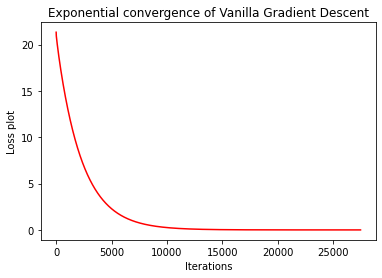

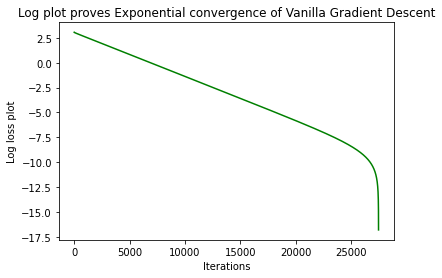

In [ ]:
# calculate error and plot
error = []                                   
for i in range (0,I):
  diff = np.subtract(xMin, xList[i])         #find the error X* - X
  error.append(norm(diff))         

#plot values over time
plt.plot(list(range(0,I)),error,'r')
plt.title('Exponential convergence of Vanilla Gradient Descent')
plt.xlabel('Iterations')
plt.ylabel('Loss plot')
plt.show()
print('\n')

#verify exponential convergence
plt.title('Log plot proves Exponential convergence of Vanilla Gradient Descent')
plt.xlabel('Iterations')
plt.ylabel('Log loss plot')
plt.plot(list(range(0,I)), np.log(error),'g')
plt.show()

##**For an α > 0 small enough to guarantee convergence, implement gradient descent for this problem.  Plot the error of ||xk−x∗||, and show that it agrees with the exponential convergence we expect from the results in class. How can you verify this?**

The first graph indicates that error agrees with exponential convergence as the curve decreases to 0 over time. But why exponential convergence? Because, for a good chosen alpha value, the error decreases significantly exponentially. 

But we need to prove that it is decreasing significantly exponentially. A Log plot generally converges to negative infinity faster. So if we take the log loss plot of the error, then it should converge faster now. The second plot proves just that.

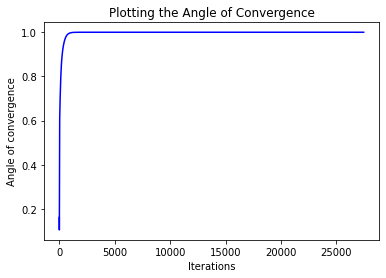

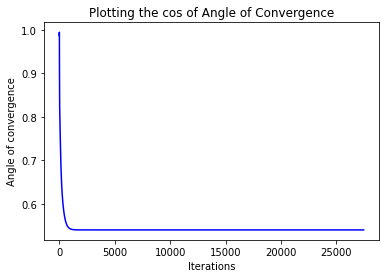

In [ ]:
# plotting the angle of convergence
angleList = []
for k in range(0,I):
  A = xList[k+1] - xList[k]
  B = xMin - xList[k]
  C = norm(A)
  D = norm(B)
  numerator = np.dot(A.T,B)
  denominator = C*D
  angle =(numerator/denominator)
  angleList.append(angle)

plt.plot(list(range(0,I)), angleList,'b')
#plt.ylim([0,1])
plt.title('Plotting the Angle of Convergence')
plt.ylabel('Angle of convergence')
plt.xlabel('Iterations')
plt.show()

# plotting the cos of angle of convergence
angleList = []
for k in range(0,I):
  A = xList[k+1] - xList[k]
  B = xMin - xList[k]
  C = norm(A)
  D = norm(B)
  numerator = np.dot(A.T,B)
  denominator = C*D
  angle =math.cos(numerator/denominator)
  angleList.append(angle)

plt.plot(list(range(0,I)), angleList,'b')
#plt.ylim([0,1])
plt.title('Plotting the cos of Angle of Convergence')
plt.ylabel('Angle of convergence')
plt.xlabel('Iterations')
plt.show()

##**What does the plot suggest about how the iterates approach the minimizer?**<br>
* We start at a random point on the convex bowl. Then slowly converge towards the minimizer. 
* The angle between "the point where we are at currently to the minimizer" and "where we are at currently towards where we are headed" is decreasing over time towards zero. There are no deviations from a smooth path towards the minimizer.
<br><br>

##**Are the rates of convergence of the iterates and the behavior of the approach consistent across different starting points, stepsizes, and Q, c choices?**<br>
* My approach is to calculate the norm of the gradient i.e., ||QX-c|| for each X in the iteration. When the L2 norm ~ 0, then the execution stops.
* Across all starting points, Q and c choices, I did see a convergence to zero for the iterates and for the behaviour of approach. For the stepsizes, I tried and tested a few values for my approach, but I found 0.01 as a really good value for alpha. It converges very slowly by taking high number of iterations, but does guarantee convergence. 

## **2. OPTIMIZED GRADIENT DESCENT**

##**Instead  of  taking α as  a  constant,  take αk to  be  the  optimal  stepsize  for  gradient  descent  as  found previously.**                 
optimal alpha = (p^T p) / (p^T Q p)<br>
(taken as derived previously in part 1)

Code implementation below:
                  

In [ ]:
#X1 is the same start vector
x1List = []
x1List.append(X1)
#count iterations
optI = 0
# starting optimum alpha value for gradient descent
p = np.dot(Q,X1)-c
num = np.dot(np.transpose(p),p)
den = np.dot(np.dot(np.transpose(p),Q),p)
alpha_o = num/den
print('Initial Optimal alpha: ', alpha_o)

Initial Optimal alpha:  0.038066679055801904


In [ ]:
#implement optimum gradient descent
for i in range(0,100000):                            
  X1 = X1 - (alpha_o * (np.dot(Q,X1)-c))                   #compute new X in each iteration
  x1List.append(X1)                                        #add each Xnew to the list
  p = np.dot(Q,X1)-c                                       #compute alpha in each iteration - since, variable alpha
  num = np.dot(np.transpose(p),p)
  den = np.dot(np.dot(np.transpose(p),Q),p)
  alpha_o = num/den
  #print(alpha_o)
  J = gradient_norm(Q,X1,c)                                #take norm of gradient
  #print(J)
  optI+=1
  if(J == 0.0):                                            #end when gradient = 0
    xMin_o = X1
    break
print('Number of iterations taken: ',optI)

Number of iterations taken:  4259


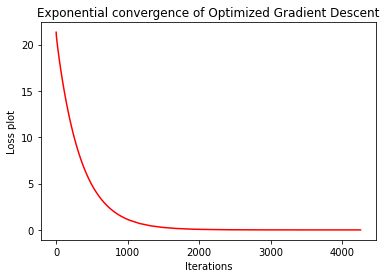

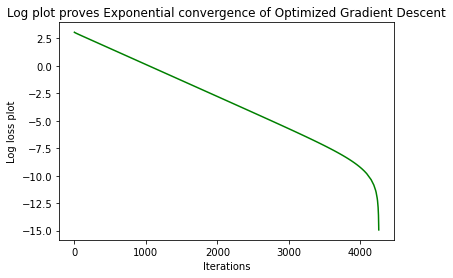

In [ ]:
# calculate error and plot
error_o = []                                   
for i in range (0,optI):
  diff_o = np.subtract(xMin_o, x1List[i])         #find the error X* - X
  error_o.append(norm(diff_o))         

#plot values over time
plt.plot(list(range(0,optI)),error_o,'r')
plt.title('Exponential convergence of Optimized Gradient Descent')
plt.xlabel('Iterations')
plt.ylabel('Loss plot')
plt.show()
print('\n')

#verify exponential convergence
plt.title('Log plot proves Exponential convergence of Optimized Gradient Descent')
plt.xlabel('Iterations')
plt.ylabel('Log loss plot')
plt.plot(list(range(0,optI)), np.log(error_o),'g')
plt.show()

Log plot converging faster to negative infinity, so exponential convergence is verified.

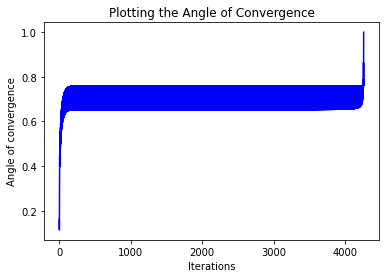

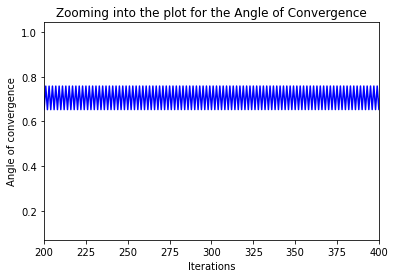

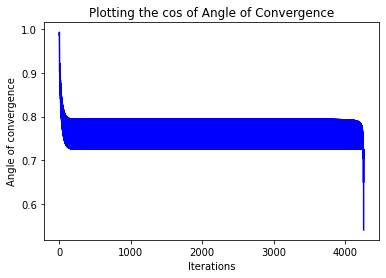

In [ ]:
# plotting the angle of convergence
angleList_o = []
for k in range(0,optI):
  A = x1List[k+1] - x1List[k]
  B = xMin_o - x1List[k]
  C = norm(A)
  D = norm(B)
  numerator = np.dot(A.T,B)
  denominator = C*D
  angle_o =(numerator/denominator)
  #print(angle_o)
  angleList_o.append(angle_o)

plt.plot(list(range(0,optI)), angleList_o,'b')
#plt.ylim([0,1])
plt.title('Plotting the Angle of Convergence')
plt.ylabel('Angle of convergence')
plt.xlabel('Iterations')
plt.show()

print('\n')

plt.plot(list(range(0,optI)), angleList_o,'b')
plt.title('Zooming into the plot for the Angle of Convergence')
plt.xlim([200,400])
plt.ylabel('Angle of convergence')
plt.xlabel('Iterations')
plt.show()
print('\n')
angleList_o = []
for k in range(0,optI):
  A = x1List[k+1] - x1List[k]
  B = xMin_o - x1List[k]
  C = norm(A)
  D = norm(B)
  numerator = np.dot(A.T,B)
  denominator = C*D
  angle_o =math.cos(numerator/denominator)
  angleList_o.append(angle_o)

plt.plot(list(range(0,optI)), angleList_o,'b')
#plt.ylim([0,1])
plt.title('Plotting the cos of Angle of Convergence')
plt.ylabel('Angle of convergence')
plt.xlabel('Iterations')
plt.show()

##**How does this change the rate of convergence?  Be as specific as you can.**<br>
*   If we compare the graphs closely, the plot for optimized gradient descent takes less iterations to converge compared to vanilla gradient descent.
*   That means, rather than a fixed alpha (step size), a variable step size converges faster. This is because we have the information of the gradient of the function at that X which is (x[k] - x[k-1]). As long as the gradient is positive, the function decreases and we move towards the minimum
.<br><br>

##**How does this change the angle of approach as the iterates converge to the minimum?**<br>
*  The angle decreaases to an interval in which it oscillates back and forth. Taking an xLim on the values show that zooming in. Over most of the iterations, the angle is oscillating, meaning that the iterates are jumping around back and forth (within the same interval) before ultimately converging to the minimum.
<br><br>

##**Are these behaviors consistent?**<br>
* For all the starting points for which I observed the behaviour of approach, I always saw the iterates' angles oscillating within an interval, and then decreasing to zero. It looks like the iterates find an angle better than they first observed, try to jump around the minimum before finding a step size that takes them to the minimum.

## **3. VANILLA MOMENTUM**

Once nudged towards a direction, we stay in that direction because of momentum.

In [ ]:
# constant alpha and beta values
alpha_m = 0.01
beta_m = 0.9

# X2 is the same start vector
x2List = []
x2List.append(X2)

#count iterations
mI = 0

#implement gradient descent
for i in range(0,100000):     
  if(i == 0):                         
    X2 = X2 - ( alpha_m * ((Q@X2)-c) ) + ( beta_m * X2)                   #initially, we do not have X[k-1]
  else:
    X2 = X2 - ( alpha_m * ((Q@X2)-c) ) + ( beta_m * (X2 - x2List[i-1]))         
  x2List.append(X2)                                                                      
  J = gradient_norm(Q, X2, c)
  mI+=1
  if(J == 0):                                                             #end when gradient = 0
    xMin_m = X2
    break
print('Number of iterations taken: ',mI)

Number of iterations taken:  2324


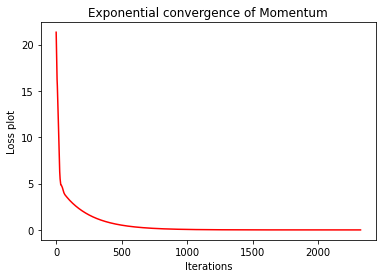

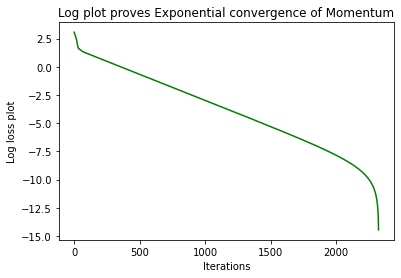

In [ ]:
# calculate error and plot
error_m = []                                   #list to store all values
for i in range (0,mI):
  diff_m = np.subtract(xMin_m, x2List[i])         #find the error X* - X
  error_m.append(norm(diff_m))         

#plot values over time
plt.plot(list(range(0,mI)),error_m,'r')
plt.title('Exponential convergence of Momentum')
plt.xlabel('Iterations')
plt.ylabel('Loss plot')
plt.show()
print('\n')

#verify exponential convergence
plt.title('Log plot proves Exponential convergence of Momentum')
plt.xlabel('Iterations')
plt.ylabel('Log loss plot')
plt.plot(list(range(0,mI)), np.log(error_m),'g')
plt.show()

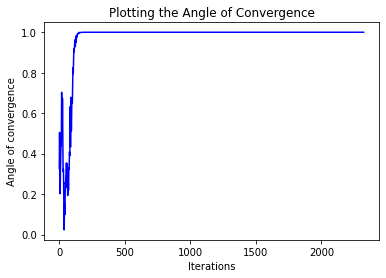

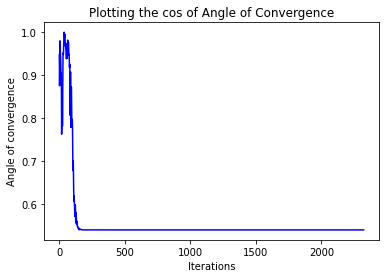

In [ ]:
# plotting the angle of convergence
angleList_m = []
for k in range(0,mI):
  A = x2List[k+1] - x2List[k]
  B = xMin_m - x2List[k]
  C = norm(A)
  D = norm(B)
  numerator = np.dot(A.T,B)
  denominator = C*D
  angle_m =(numerator/denominator)
  #print(angle_m)
  angleList_m.append(angle_m)

plt.plot(list(range(0,mI)), angleList_m,'b')
plt.title('Plotting the Angle of Convergence')
plt.ylabel('Angle of convergence')
plt.xlabel('Iterations')
plt.show()
print('\n')
# plotting the cos of angle of convergence
angleList_m = []
for k in range(0,mI):
  A = x2List[k+1] - x2List[k]
  B = xMin_m - x2List[k]
  C = norm(A)
  D = norm(B)
  numerator = np.dot(A.T,B)
  denominator = C*D
  angle_m =math.cos(numerator/denominator)
  #print(angle_m)
  angleList_m.append(angle_m)

plt.plot(list(range(0,mI)), angleList_m,'b')
plt.title('Plotting the cos of Angle of Convergence')
plt.ylabel('Angle of convergence')
plt.xlabel('Iterations')
plt.show()

##**How can you find β, α to guarantee convergence?  Are these the best constants you can find?**<br>

*   I took the approach of trial and error to find β, α values that converged faster than previous methods. For the alpha values, I tried to limit them by the eigenvalues of Q i.e., any value less than (2/λ) where λs are eigenvalues of Q. For β, I tried to take a value that is close to 1. 
*   I believe these are the best values I can find because I am keeping them within their limits:
   1. The maximum λ makes α as small as possible (α < 2/λmax).
   2. For β, if I go further up than 1, then the direction would go backwards and I would not get a descent. And if I go less than 0, I might not converge to a local minimum. So, for the (0,1) interval, β=0.9 works very well. 
<br>

##**For the best α, β you can find in the above question, what can you say about the rate of convergence, and how does it compare to gradient descent? Can you find α, β to make the convergence rate better than vanilla gradient descent? How does it compare to optimized gradient descent?**

* For the rate of convergence, I cannot ignore the lesser number of iterations that momentum method takes compared to vanilla and optimized gradient descent. The plot converges exponentially quicker to 0. 
* In relation to Vanilla Gradient Descent, one can say that it is a special case of momentum, in that β=0. However, having α = a, β = b constants is better than α = a, β=0. This is because we will be able to converge faster if we are not only going for a descent with a good step size, but also having a descent in the right direction i.e., in the direction of the minimum. This way, we can eliminate a large number of iterations that we would have otherwise.
* In relation to Optimized Gradient Descent, I would again argue the same about the lesser number of iterations we could benefit from Momentum, as it has a factor that determines the direction along with the step size. Even though Optimized Gradient Descent uses a variable step size that converges faster than a fixed step size, it is evident from the number of iterations and behaviour of the graphs that a nudge in a direction will lead to convergence faster.<br>

##**Again, plot the angle of approach to the minimizer for these momentum iterates. What can you say about the approach to the minimizer, and how does it compare to the previous results?**<br>
* Over different starting points, I saw different behaviours as the iterates approached the minimizer. But for the most part, I observed a non-smooth curve at the beginning, moving downward quickly and then converging exponentially towards 0.
* This is much better than vanilla gradient that converges pretty slowly and also optimized gradient descent that oscillates and goes back and forth too much over a fixed interval before converging to 0. Momentum is approaching fairly faster towards minimizer.

##**Do the trends you observe above generalize, with α, β, Q, c?  How does vanilla momentum compare with vanilla gradient descent? With optimized gradient descent?**
* I believe the trends can be generalized for most cases (at least that's what I observed). Because we can never exactly expect the behaviour as the iterates converge to the minimum. Sometimes, iterates spiral in the convex bowl too much in circles and sometimes they spiral too much jumping over the other sides and sometimes they converge fairly faster to the minimum. 
* What I can generalize though, is that for momentum method these behaviours happen in the first few iterations before converging to minimum.
* Vanilla gradient descent had a smooth curve for angle of approach. Optimized gradient descent oscillated too much over a large number of iterations.

## **OPTIMIZED MOMENTUM**

In [ ]:
# X3 is the same start vector
x3List = []
x3List.append(X3)

#defining initial p and q
p = np.dot(Q,X3)-c
q = X3

# alpha and beta values
alpha_mo = (np.dot(np.dot(np.transpose(p),p),np.dot(np.dot(np.transpose(q),Q),q)) - np.dot(np.dot(np.transpose(q),p),np.dot(np.dot(np.transpose(p),Q),q)))/(np.dot(np.dot(np.dot(np.transpose(q),Q),q),np.dot(np.dot(np.transpose(p),Q),p)) - np.dot(np.dot(np.dot(np.transpose(p),Q),q),np.dot(np.dot(np.transpose(p),Q),q)))
beta_mo = (np.dot(np.dot(np.transpose(p),p),np.dot(np.dot(np.transpose(p),Q),q)) - np.dot(np.dot(np.transpose(q),p),np.dot(np.dot(np.transpose(p),Q),p)))/(np.dot(np.dot(np.dot(np.transpose(q),Q),q),np.dot(np.dot(np.transpose(p),Q),p)) - np.dot(np.dot(np.dot(np.transpose(p),Q),q),np.dot(np.dot(np.transpose(p),Q),q)))
alpha_mo = round(alpha_mo,5)
beta_mo = round(beta_mo,5)
# print(alpha_mo)
# print(beta_mo)

X3 = X3 - ( alpha_mo * p ) + ( beta_mo * q)         
x3List.append(X3)  

#count iterations
optm = 0

#implement gradient descent
for i in range(1,100000):                                  
  p = np.dot(Q,X3)-c
  q = x3List[i] - x3List[i-1]
  alpha_mo = (np.dot(np.dot(np.transpose(p),p),np.dot(np.dot(np.transpose(q),Q),q)) - np.dot(np.dot(np.transpose(q),p),np.dot(np.dot(np.transpose(p),Q),q)))/(np.dot(np.dot(np.dot(np.transpose(q),Q),q),np.dot(np.dot(np.transpose(p),Q),p)) - np.dot(np.dot(np.dot(np.transpose(p),Q),q),np.dot(np.dot(np.transpose(p),Q),q)))
  beta_mo = (np.dot(np.dot(np.transpose(p),p),np.dot(np.dot(np.transpose(p),Q),q)) - np.dot(np.dot(np.transpose(q),p),np.dot(np.dot(np.transpose(p),Q),p)))/(np.dot(np.dot(np.dot(np.transpose(q),Q),q),np.dot(np.dot(np.transpose(p),Q),p)) - np.dot(np.dot(np.dot(np.transpose(p),Q),q),np.dot(np.dot(np.transpose(p),Q),q)))
  alpha_mo = round(alpha_mo,5)
  beta_mo = round(beta_mo,5)
  X3 = X3 - ( alpha_mo * p ) + ( beta_mo * q)         
  x3List.append(X3)                                                            
  J = gradient_norm(Q, X3, c)
  optm+=1
  if(J == 0):   #end when gradient = 0
    xMin_mo = X3
    break
print('Number of iterations taken: ',optm)

Number of iterations taken:  49


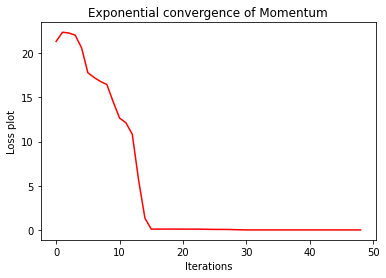

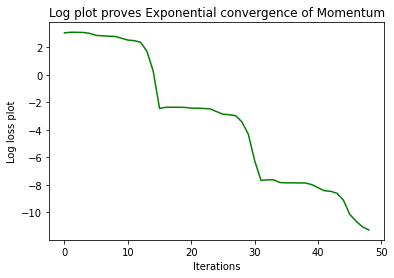

In [ ]:
# calculate error and plot
error_mo = []                                   #list to store all values
for i in range (0,optm):
  diff_mo = np.subtract(xMin_mo, x3List[i])         #find the error X* - X
  error_mo.append(norm(diff_mo))         #append norm to error[]

#plot values over time
plt.plot(list(range(0,optm)),error_mo,'r')
plt.title('Exponential convergence of Momentum')
plt.xlabel('Iterations')
plt.ylabel('Loss plot')
plt.show()
print('\n')

#verify exponential convergence
plt.title('Log plot proves Exponential convergence of Momentum')
plt.xlabel('Iterations')
plt.ylabel('Log loss plot')
plt.plot(list(range(0,optm)), np.log(error_mo),'g')
plt.show()

Optimized momentum drops very quickly to the minimum. A nudge towards the direction of the minimum makes the graph to start converging quickly.

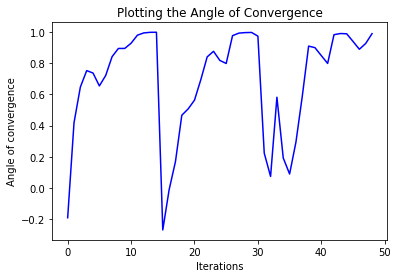

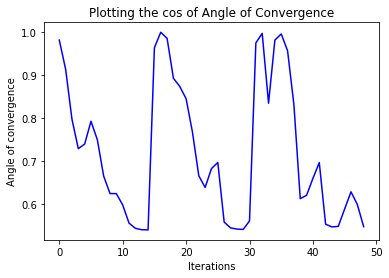

In [ ]:
# plotting the angle of convergence
angleList_mo = []
for k in range(0,optm):
  A = x3List[k+1] - x3List[k]
  B = xMin_mo - x3List[k]
  C = norm(A)
  D = norm(B)
  numerator = np.dot(A.T,B)
  denominator = C*D
  angle_mo =(numerator/denominator)
  #print(angle_mo)
  angleList_mo.append(angle_mo)

plt.plot(list(range(0,optm)), angleList_mo,'b')
#plt.ylim([0,1])
plt.title('Plotting the Angle of Convergence')
plt.ylabel('Angle of convergence')
plt.xlabel('Iterations')
plt.show()

# plotting the cos of angle of convergence
angleList_mo = []
for k in range(0,optm):
  A = x3List[k+1] - x3List[k]
  B = xMin_mo - x3List[k]
  C = norm(A)
  D = norm(B)
  numerator = np.dot(A.T,B)
  denominator = C*D
  angle_mo =math.cos(numerator/denominator)
  angleList_mo.append(angle_mo)

plt.plot(list(range(0,optm)), angleList_mo,'b')
#plt.ylim([0,1])
plt.title('Plotting the cos of Angle of Convergence')
plt.ylabel('Angle of convergence')
plt.xlabel('Iterations')
plt.show()

**Angle of Convergence**<br>
We are spiraling in the convex bowl. Moving towards and away from the minimizer, but lastly converging to the minimum. Each time, pushed at a slight angle towards minimizer, missed the minimizer, roll up the side, roll back down. That is, roll back and forth as it settles down at the bottom gradually. The iterates are bouncnig around the minimizer, oscillating back and forth. But the angle will never be able to go beyond 90 degrees. 

#**IS THERE A BETTER DIRECTION?**

##**What would moving directly towards the minimizer as possible ‘look like’, in terms of the iterates?  How does this compare to the behavior of gradient descent and momentum methods as above?**
* I can imagine an algorithm with comparitively lesser iterates with step size directing them towards minimum. 
* If there is a better algorithm that converges faster than the methods covered in this assignment:
>1. Compared to Gradient descent methods, the better algorithm will skip the number of steps gradient descent method will take to reach a point close to the minimum. Because alpha took a lot of iterations. A better algorithm could accelerate that.
>2. Compared to Momentum methods, the better algorithm could generate a direction each time, that is more directed towards the minimizer.

So, moving directly towards the minimum, better than gradient and momentum methods would look like a convergence graph taking large step sizes and not oscillating back and forth too farther. In simpler words, their variations might look more "flat" compared to the variations we observed here.


##**Given a vector pk, how can we generate a qk that is orthogonal to pk?**
* To move in an orthogonal direction we could use Gram-Schmidt Method.
* Make qk perpendicular to pk.

> 1. Normalize pk to get its unit vector (say vector'a') -> a = (1 / ||pk||).pk<br>
2. Modify qk by removing its projection in direction of unit vector 'a': 
<br>b = qk - (qk.a)a
3. Normalize qk as (1 / ||qk||).qk



##**Implementing this modified momentum descent with optimal αk, βk, how does this method of choosing qk influence the convergence rate and the directions of approach? How does it compare with momentum methods generally?**
(code below)

In [ ]:
# X4 is the same start vector
x4List = []
x4List.append(X4)

#defining initial p and q
p = np.dot(Q,X4)-c
q = X4
unitp = np.divide(p,norm(p))
q = q -((np.dot(q.T,unitp).sum())*unitp)


#initial alpha and beta values
alpha_mm = (np.dot(np.dot(np.transpose(p),p),np.dot(np.dot(np.transpose(q),Q),q)) - np.dot(np.dot(np.transpose(q),p),np.dot(np.dot(np.transpose(p),Q),q)))/(np.dot(np.dot(np.dot(np.transpose(q),Q),q),np.dot(np.dot(np.transpose(p),Q),p)) - np.dot(np.dot(np.dot(np.transpose(p),Q),q),np.dot(np.dot(np.transpose(p),Q),q)))
beta_mm = (np.dot(np.dot(np.transpose(p),p),np.dot(np.dot(np.transpose(p),Q),q)) - np.dot(np.dot(np.transpose(q),p),np.dot(np.dot(np.transpose(p),Q),p)))/(np.dot(np.dot(np.dot(np.transpose(q),Q),q),np.dot(np.dot(np.transpose(p),Q),p)) - np.dot(np.dot(np.dot(np.transpose(p),Q),q),np.dot(np.dot(np.transpose(p),Q),q)))
alpha_mm = round(alpha_mm,5)
beta_mm = round(beta_mm,5)
# print(alpha_mm)
# print(beta_mm)

X4 = X4 - ( alpha_mm * p ) + ( beta_mm * q)         
x4List.append(X4)  

#count iterations
optmm = 0

#implement gradient descent
for i in range(1,100000):                                  
  p = np.dot(Q,X4)-c
  q = x4List[i] - x4List[i-1]
  unitp = np.divide(p,norm(p))
  q = q -((np.dot(q.T,unitp).sum())*unitp)
  alpha_mm = (np.dot(np.dot(np.transpose(p),p),np.dot(np.dot(np.transpose(q),Q),q)) - np.dot(np.dot(np.transpose(q),p),np.dot(np.dot(np.transpose(p),Q),q)))/(np.dot(np.dot(np.dot(np.transpose(q),Q),q),np.dot(np.dot(np.transpose(p),Q),p)) - np.dot(np.dot(np.dot(np.transpose(p),Q),q),np.dot(np.dot(np.transpose(p),Q),q)))
  beta_mm = (np.dot(np.dot(np.transpose(p),p),np.dot(np.dot(np.transpose(p),Q),q)) - np.dot(np.dot(np.transpose(q),p),np.dot(np.dot(np.transpose(p),Q),p)))/(np.dot(np.dot(np.dot(np.transpose(q),Q),q),np.dot(np.dot(np.transpose(p),Q),p)) - np.dot(np.dot(np.dot(np.transpose(p),Q),q),np.dot(np.dot(np.transpose(p),Q),q)))
  alpha_mm = round(alpha_mm,5)
  beta_mm = round(beta_mm,5)
  X4 = X4 - ( alpha_mm * p ) + ( beta_mm * q)         
  x4List.append(X4)                                                            
  J = gradient_norm(Q, X4, c)
  optmm+=1
  if(J == 0):   #end when gradient = 0
    xMin_mm = X4
    break
print('Number of iterations taken: ',optmm)

Number of iterations taken:  126


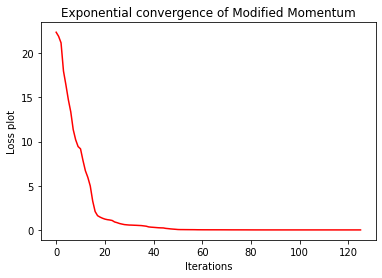

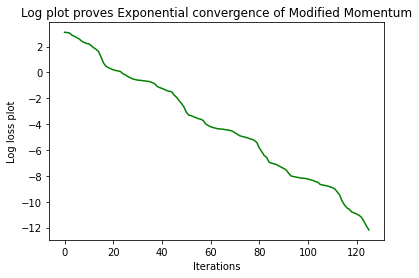

In [ ]:
# calculate error and plot
error_mm = []                                   #list to store all values
for i in range (0,optmm):
  diff_mm = np.subtract(xMin_mm, x4List[i])         #find the error X* - X
  error_mm.append(norm(diff_mm))         #append norm to error[]

#plot values over time
plt.plot(list(range(0,optmm)),error_mm,'r')
plt.title('Exponential convergence of Modified Momentum')
plt.xlabel('Iterations')
plt.ylabel('Loss plot')
plt.show()
print('\n')

#verify exponential convergence
plt.title('Log plot proves Exponential convergence of Modified Momentum')
plt.xlabel('Iterations')
plt.ylabel('Log loss plot')
plt.plot(list(range(0,optmm)), np.log(error_mm),'g')
plt.show()

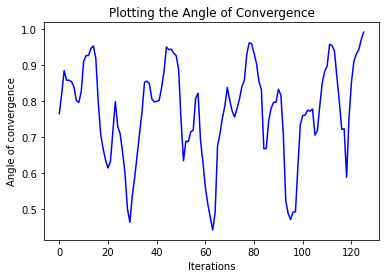

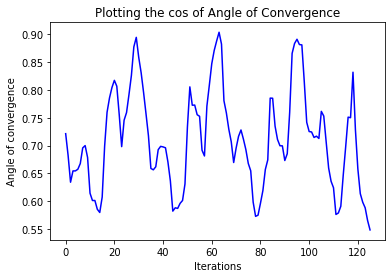

In [ ]:
# plotting the angle of convergence
angleList_mm = []
for k in range(0,optmm):
  A = x4List[k+1] - x4List[k]
  B = xMin_mm - x4List[k]
  C = norm(A)
  D = norm(B)
  numerator = np.dot(A.T,B)
  denominator = C*D
  angle_mm =(numerator/denominator)
  #print(angle_mm)
  angleList_mm.append(angle_mm)

plt.plot(list(range(0,optmm)), angleList_mm,'b')
#plt.ylim([0,1])
plt.title('Plotting the Angle of Convergence')
plt.ylabel('Angle of convergence')
plt.xlabel('Iterations')
plt.show()
print('\n')
# plotting the cos of angle of convergence
angleList_mm = []
for k in range(0,optmm):
  A = x4List[k+1] - x4List[k]
  B = xMin_mm - x4List[k]
  C = norm(A)
  D = norm(B)
  numerator = np.dot(A.T,B)
  denominator = C*D
  angle_mm =math.cos(numerator/denominator)
  #print(angle_mm)
  angleList_mm.append(angle_mm)

plt.plot(list(range(0,optmm)), angleList_mm,'b')
#plt.ylim([0,1])
plt.title('Plotting the cos of Angle of Convergence')
plt.ylabel('Angle of convergence')
plt.xlabel('Iterations')
plt.show()

The iterates move around the bowl too much before converging to 0.

## **Try to come up with a better way of generating an additional direction to move in - note that you cannot use X∗ or Q^−1, since if we knew either of these, none of this would be necessary.**<br>
* We would like to move as close to the minimizer as possible. 
* A better way to generate an additional direction to move in than gradient and momentum that I have discovered, is *Conjugate Gradient Method* which was originially discovered to minimize the convex function we are trying to minimize in this asssignment. Also, it works if H is positive definite.
* **We can benefit from Conjugate descent because it uses both first and second derivative information.**
* **That is why, the desired characteristics in our algorithm of having larger step sizes directly going towards the minimizer, and aiming at a better direction towards the minimizer (the angle xk and xk+1 is increased and as the iterations run they direct toward minimizer) are satisfied.**
